In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import nltk
import re
import wordcloud
import warnings
warnings.filterwarnings('ignore')

In [28]:
'''

project name : shinzo abe tweeter sentiments
author : @kanishksh4rma

'''

'\n\nproject name : shinzo abe tweeter sentiments\nauthor : @kanishksh4rma\n\n'

In [29]:
df = pd.read_csv('Shinzo-Abe-Tweets.csv')
df.head()

,url,Full Name Show,Username Dir,Tweet Nav,Tweet Nav_link,Tweet Text Size Block,English Translation,Tweet Text Size Link,Tweet Text Size Link_link,Profile Tweet 1,Profile Tweet 2,Profile Tweet 3,Reply,Re Tweet,Like
0,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 21,https://twitter.com/AbeShinzo/status/921745765...,選挙期間中、自民党の候補者たちは全国各地で我々の経済政策を、安全保障を、そして日本の将来を担...,"During the election period, candidates who of ...",https://twitter.com/jimin_koho/status/92174405...,https://t.co/HVjFn3QJp5,"1,133 replies","5,752 retweets","14,514 likes",1.1K,5.8K,15K
1,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 20,https://twitter.com/AbeShinzo/status/921350545...,外国人旅行者数はこの５年間で３倍になりました。自民党は高次元での観光資源施策に取り組み我が国...,Foreign visitors number has tripled over the p...,pic.twitter.com/EMNDcADrYB,https://t.co/EMNDcADrYB,606 replies,"3,712 retweets","8,946 likes",606,3.7K,8.9K
2,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 20,https://twitter.com/AbeShinzo/status/921322049...,明日１０月２１日(土) 安倍晋三総裁は岐阜県、愛知県、東京都に参ります。 詳細は是非、自民党...,"Tomorrow, October 21 (Saturday) Susumusan Abe ...",https://special.jimin.jp/,https://t.co/vKXI8z5Mjr,358 replies,"2,213 retweets","4,922 likes",358,2.2K,4.9K
3,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 19,https://twitter.com/AbeShinzo/status/920998741...,我々がスタートした返さなくても良い「給付型奨学金」や「授業料免除」といった制度を拡充し、真に...,"It has expanded the system, such as it is not ...",pic.twitter.com/ZgAYDhlzDD,https://t.co/ZgAYDhlzDD,456 replies,"3,081 retweets","6,576 likes",456,3.1K,6.6K
4,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 19,https://twitter.com/AbeShinzo/status/920991367...,明日１０月２０日(金) 安倍晋三総裁は神奈川県、東京都に参ります。 詳細は是非、自民党の特設...,"Tomorrow, October 20 (Friday) Susumusan Abe Pr...",https://special.jimin.jp/,https://t.co/vKXI8z5Mjr,271 replies,"2,291 retweets","5,610 likes",271,2.3K,5.6K


In [30]:
df.head()

,url,Full Name Show,Username Dir,Tweet Nav,Tweet Nav_link,Tweet Text Size Block,English Translation,Tweet Text Size Link,Tweet Text Size Link_link,Profile Tweet 1,Profile Tweet 2,Profile Tweet 3,Reply,Re Tweet,Like
0,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 21,https://twitter.com/AbeShinzo/status/921745765...,選挙期間中、自民党の候補者たちは全国各地で我々の経済政策を、安全保障を、そして日本の将来を担...,"During the election period, candidates who of ...",https://twitter.com/jimin_koho/status/92174405...,https://t.co/HVjFn3QJp5,"1,133 replies","5,752 retweets","14,514 likes",1.1K,5.8K,15K
1,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 20,https://twitter.com/AbeShinzo/status/921350545...,外国人旅行者数はこの５年間で３倍になりました。自民党は高次元での観光資源施策に取り組み我が国...,Foreign visitors number has tripled over the p...,pic.twitter.com/EMNDcADrYB,https://t.co/EMNDcADrYB,606 replies,"3,712 retweets","8,946 likes",606,3.7K,8.9K
2,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 20,https://twitter.com/AbeShinzo/status/921322049...,明日１０月２１日(土) 安倍晋三総裁は岐阜県、愛知県、東京都に参ります。 詳細は是非、自民党...,"Tomorrow, October 21 (Saturday) Susumusan Abe ...",https://special.jimin.jp/,https://t.co/vKXI8z5Mjr,358 replies,"2,213 retweets","4,922 likes",358,2.2K,4.9K
3,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 19,https://twitter.com/AbeShinzo/status/920998741...,我々がスタートした返さなくても良い「給付型奨学金」や「授業料免除」といった制度を拡充し、真に...,"It has expanded the system, such as it is not ...",pic.twitter.com/ZgAYDhlzDD,https://t.co/ZgAYDhlzDD,456 replies,"3,081 retweets","6,576 likes",456,3.1K,6.6K
4,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Oct 19,https://twitter.com/AbeShinzo/status/920991367...,明日１０月２０日(金) 安倍晋三総裁は神奈川県、東京都に参ります。 詳細は是非、自民党の特設...,"Tomorrow, October 20 (Friday) Susumusan Abe Pr...",https://special.jimin.jp/,https://t.co/vKXI8z5Mjr,271 replies,"2,291 retweets","5,610 likes",271,2.3K,5.6K


In [31]:
#Remove unneccesary columns

not_want = ['url','Full Name Show','Tweet Nav_link','Username Dir','Tweet Text Size Block','Tweet Text Size Link','Tweet Text Size Link_link','Profile Tweet 2','Profile Tweet 3']

df.drop(not_want,1,inplace=True)

In [32]:
df.head()

,Tweet Nav,English Translation,Profile Tweet 1,Reply,Re Tweet,Like
0,Oct 21,"During the election period, candidates who of ...","1,133 replies",1.1K,5.8K,15K
1,Oct 20,Foreign visitors number has tripled over the p...,606 replies,606,3.7K,8.9K
2,Oct 20,"Tomorrow, October 21 (Saturday) Susumusan Abe ...",358 replies,358,2.2K,4.9K
3,Oct 19,"It has expanded the system, such as it is not ...",456 replies,456,3.1K,6.6K
4,Oct 19,"Tomorrow, October 20 (Friday) Susumusan Abe Pr...",271 replies,271,2.3K,5.6K


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tweet Nav            79 non-null     object
 1   English Translation  79 non-null     object
 2   Profile Tweet 1      79 non-null     object
 3   Reply                79 non-null     object
 4   Re Tweet             79 non-null     object
 5   Like                 79 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [34]:
# cleaning the tweets

def clntxt(text):
  text = re.sub(r'@[a-zA-Z0-9]+','',text) #Remove all @mentions
  text = re.sub(r'#','',text)             # Removing '#' symbols
  text = re.sub(r'https?\/\/\S+','',text) #Removing all the web links
  text = re.sub(r'pic.\S+','',text)       #Removing all pic links
  return text

df['English Translation'] = df['English Translation'].apply(clntxt)
df['English Translation'].head()

0    During the election period, candidates who of ...
1    Foreign visitors number has tripled over the p...
2    Tomorrow, October 21 (Saturday) Susumusan Abe ...
3    It has expanded the system, such as it is not ...
4    Tomorrow, October 20 (Friday) Susumusan Abe Pr...
Name: English Translation, dtype: object

In [35]:
from textblob import TextBlob

#get the subjectivity
def subjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

#get the polarity
def polarity(txt):
  return TextBlob(txt).sentiment.polarity


df['subjectivity'] = df['English Translation'].apply(subjectivity)
df['polarity'] = df['English Translation'].apply(polarity)

df

,Tweet Nav,English Translation,Profile Tweet 1,Reply,Re Tweet,Like,subjectivity,polarity
0,Oct 21,"During the election period, candidates who of ...","1,133 replies",1.1K,5.8K,15K,0.175000,0.133333
1,Oct 20,Foreign visitors number has tripled over the p...,606 replies,606,3.7K,8.9K,0.337857,-0.016429
2,Oct 20,"Tomorrow, October 21 (Saturday) Susumusan Abe ...",358 replies,358,2.2K,4.9K,0.535714,0.428571
3,Oct 19,"It has expanded the system, such as it is not ...",456 replies,456,3.1K,6.6K,0.700000,0.162500
4,Oct 19,"Tomorrow, October 20 (Friday) Susumusan Abe Pr...",271 replies,271,2.3K,5.6K,0.535714,0.428571
...,...,...,...,...,...,...,...,...
74,4 Mar 2016,Upon exiting after a long time the official re...,144 replies,144,909,2.0K,0.396970,0.034091
75,4 Mar 2016,The Ms Japan contest started in 1950. The winn...,33 replies,33,186,403,0.000000,0.000000
76,4 Mar 2016,"""Miss Japan contest"" is a historic tournament ...",113 replies,113,492,1.2K,0.266667,-0.016667
77,25 Feb 2016,"One of the results will affect everyone, the u...",644 replies,644,950,2.6K,0.629221,0.273052


In [36]:
#Convert 'K' to 1000 in likes, retweets and replies

def remove_k(text):

  text = text.replace('.','')    # remove the digit separator
  ret_text = text.replace('K','000')  
  ret_text = int(ret_text)      #convert str to int
  return ret_text

df['Like'] = df['Like'].apply(remove_k)
df['Re Tweet'] = df['Re Tweet'].apply(remove_k)
df['Reply'] = df['Reply'].apply(remove_k)

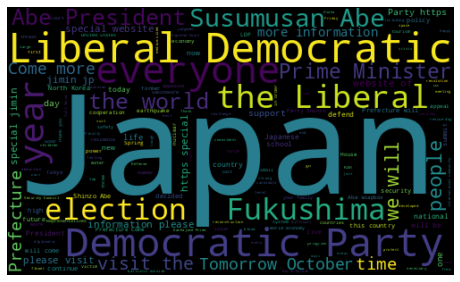

In [37]:
#Visualize most used words

allwords = ' '.join(x for x in df['English Translation'])

wordclouD = wordcloud.WordCloud(width=500,height=300,random_state=21,max_font_size= 156).generate(allwords)

plt.imshow(wordclouD,interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
#converting polarity to sentiment

def sentiment(polarity):
  if polarity<0:
    report = 'Negative'
  elif polarity == 0:
    report = 'Neutral'
  else:
    report = 'Positive'
  return report

In [39]:
df['Sentiment'] = df['polarity'].apply(sentiment)
df.head()

,Tweet Nav,English Translation,Profile Tweet 1,Reply,Re Tweet,Like,subjectivity,polarity,Sentiment
0,Oct 21,"During the election period, candidates who of ...","1,133 replies",11000,58000,15000,0.175000,0.133333,Positive
1,Oct 20,Foreign visitors number has tripled over the p...,606 replies,606,37000,89000,0.337857,-0.016429,Negative
2,Oct 20,"Tomorrow, October 21 (Saturday) Susumusan Abe ...",358 replies,358,22000,49000,0.535714,0.428571,Positive
3,Oct 19,"It has expanded the system, such as it is not ...",456 replies,456,31000,66000,0.700000,0.162500,Positive
4,Oct 19,"Tomorrow, October 20 (Friday) Susumusan Abe Pr...",271 replies,271,23000,56000,0.535714,0.428571,Positive


In [40]:
# print all the positive tweets
j = 1
sorted_df = df.sort_values('polarity',ascending=False)
for i in range(0,sorted_df.shape[0]):
  if (sorted_df.iloc[i]['Sentiment'] == 'Positive'):
    print(j,')',sorted_df.iloc[i]['English Translation'])
    print()
    j += 1

1 ) Happy to meet Shinzo Abe to celebrate 150 years of strong diplomatic ties between our two countries  begov / QSRASvNmMc

2 ) 5 years from the Great East Japan Earthquake has passed. Beloved of your family and relatives, to those who have been lost to your friends, you dedicate condolences from the innermost feelings. With say prayers and Yasukare forever before the Spirit, we decided to renew our commitment to go accomplished the reconstruction leading to the creation of the region. 

3 ) Good discussions w. Leading experts in economics in Washington. Japan's role in world economy that is uncertain is tremendously important.

4 ) Happy New Year! This year is Nitorimashite everyone, and we will sincerely pray that will Nitorimashite a great year, Japan. I also continue to include a one year full force this year. 

5 ) There is no chance of a minute in the crisis management in Japan. Again, I was so confident.

6 ) Thank you really will gather you to a large number of everyone as "LD

In [41]:
# print all the negative tweets

j = 1
sorted_df = df.sort_values('polarity')
for i in range(0,sorted_df.shape[0]):
  if (sorted_df['Sentiment'][i] == 'Negative'):
    print(j,')',sorted_df['English Translation'][i])
    print()
    j += 1

1 ) Foreign visitors number has tripled over the past five years. Liberal Democratic Party is to strengthen the domestic tourism resources of traditional cultural assets of the efforts our country in tourism resources measures at a high level, we will continue to further implement the activation of the tourism industry. 

2 ) This election is a major theme, which is also asked that the "Who is going to open up the children of the future.". Japan, which reached a turning point by the declining birth rate. We LDP is the possibility of all of the children, we are supported by all generations type social security system, which was firm. 

3 ) Large-scale shootings in indiscriminate, such as in this case are not allowed as it would be for any reason. Resolutely, and condemned. Japan is trying to climb over the time this is very difficult, to express our heartfelt solidarity to the United States and the United States national.

4 ) This time, the shooting incident, also referred to as the Un

In [42]:
# percentage f all the tweets
pos_tweets = df[df['Sentiment']=='Positive']
pos_tweets = round(pos_tweets.shape[0] / df.shape[0] *100,1)

# percentage f all the tweets
neg_tweets = df[df['Sentiment']=='Negative']
neg_tweets = round(neg_tweets.shape[0] / df.shape[0] *100,1)

print('Tweets sentiments : ')
print('Positive tweets : ',pos_tweets,'%')
print('Negative tweets : ',neg_tweets,'%')

Tweets sentiments : 
Positive tweets :  68.4 %
Negative tweets :  15.2 %


## Data Visualization

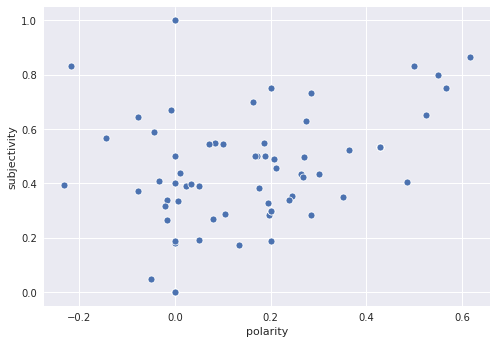

In [43]:
sns.scatterplot(x='polarity',y='subjectivity',data=df)

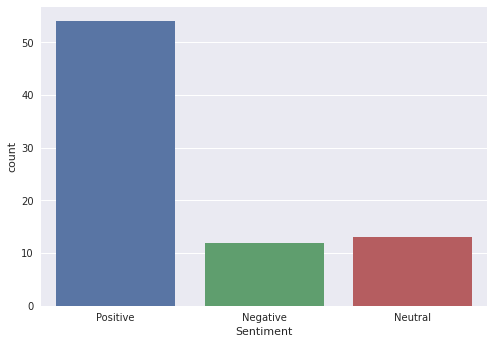

In [44]:
sns.countplot(df.Sentiment)

In [45]:
df['engaement'] = df['Like']+df['Reply']+df['Re Tweet']     #Fing Total engagement ratio

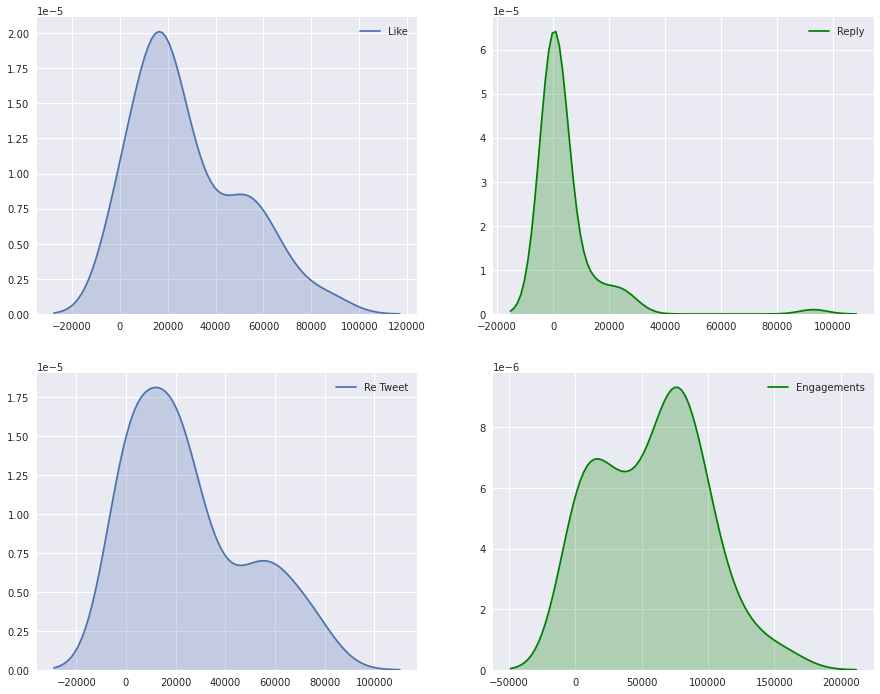

In [46]:
fig,axs = plt.subplots(2,2,figsize=(15,12))
sns.kdeplot(df['Like'],shade=True,label='Like',ax=axs[0][0])
sns.kdeplot(df['Reply'],shade=True,label='Reply',ax=axs[0][1],color='green')
sns.kdeplot(df['Re Tweet'],shade=True,label='Re Tweet',ax=axs[1][0])
sns.kdeplot(df['engaement'],shade=True,ax=axs[1][1],label='Engagements',color='green')

plt.show()